<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_kbcm_jfl/blob/reto/Reto_entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instituto Tecnológico de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

**Ciencia y Analítica de datos**

**Nombre del trabajo:** Reto -> Entrega 1: Limpieza, análisis, visualización y kmeans.

**Nombre del maestro:** María de la Paz Rico Fernández

**Nombre de los estudiantes:** Kevin Brandon Cruz Jorge Fernández Lara

**Matrículas:** A01794176 A01793062

**Fecha de entrega:** 16 de noviembre de 2022

**Objetivo:** Implementar conocimientos adquiridos a lo largo del curso en el desarrollo de un proyecto con datos reales.

Elige una de las bases de datos, ya sea la de las aguas superficiales o la de las aguas subterráneas.

Trataremos en este caso las aguas superficiales.

In [1]:

!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 23.2 MB/s 
     |████████████████████████████████| 1.0 MB 59.2 MB/s 
     |████████████████████████████████| 1.7 MB 50.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 74.0 MB/s 
     |████████████████████████████████| 6.3 MB 49.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e769f5d7ebb86e4fa189bb88818b773737e0613bc083d850997dc67af8c5d685
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=15d69b25149aef70ea20aa209b0f6cc4dfb5dc8451ae95a5a8a7ecbc6b5f5148
  Stored in directory: /root/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import read_csv
import numpy as np
import statistics as sts
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
filename = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-cad_kbcm_jfl/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'


In [4]:
df = pd.read_csv(filename, encoding='cp1252')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


El proyecto se encuentra dividido en 2 partes:
* La primera enfocada a la aplicación de los conocimientos relacionados a la Limpieza, análisis de la base de datos, visualización y agrupamiento de datos -> **Base de datos de calidad de agua**

* La segunda, enfocada a implementar un clasificador, de acuerdo al color del semáforo.

### **Limpieza, análisis y visualización y agrupamiento**

En esta base de datos encontrarás:
* Aguas superficiales.



## **Limpieza de base de datos**

## **Explorar cada dato**

Auxiliate de describe(), mean(), plot, boxplot de pandas.

* Identificando tendencias centrales, promedio, media y mediana de los datos.
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 


In [5]:
df.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [6]:
df.mean(numeric_only = True)

LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

In [7]:
df.mode(numeric_only=True, axis="index").iloc[0]

LONGITUD                  -105.25951
LATITUD                     14.61567
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
Name: 0, dtype: float64

In [8]:
df.median(numeric_only=True, axis = 0)

LONGITUD                   -99.79553
LATITUD                     20.14898
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
dtype: float64

In [9]:
df.max(numeric_only=True)

LONGITUD                   -86.73215
LATITUD                     32.70650
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
dtype: float64

In [10]:
df.min(numeric_only=True)

LONGITUD                  -117.12403
LATITUD                     14.53491
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
dtype: float64

In [11]:
df.std(numeric_only=True)

LONGITUD                  6.122773
LATITUD                   3.893696
PERIODO                   0.000000
TOX_D_48_FON_UT                NaN
CALIDAD_TOX_D_48_FON           NaN
TOX_FIS_FON_15_UT              NaN
CALIDAD_TOX_FIS_FON_15         NaN
dtype: float64

In [12]:
df.var(numeric_only=True)

LONGITUD                  37.488354
LATITUD                   15.160869
PERIODO                    0.000000
TOX_D_48_FON_UT                 NaN
CALIDAD_TOX_D_48_FON            NaN
TOX_FIS_FON_15_UT               NaN
CALIDAD_TOX_FIS_FON_15          NaN
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

Dónde:

0. **CLAVE:** es categórico Identificador del registro
1. **SITIO:** es categórica sobre ubicación
2. **ORGANISMO_DE_CUENCA:** categórica que identifica al responsable de administrar y preservar las aguas nacionales en cada una de las trece regiones hidrológico-administrativas en que se ha dividido el país
3. **ESTADO:** categórica sobre el estado en que está ubicado el sitio de muestreo
4. **MUNICIPIO:** categórica sobre el municipio en que está ubicado el sitio de muestreo
5. **CUENCA:** categórica sobre el nombre de la cuenca donde se localiza el sitio de monitoreo
6. **CUERPO DE AGUA:** categórica sobre el nombre del cuerpo de agua donde se localiza el sitio de monitoreo
7. **TIPO:** Categórica sobre el tipo de cuerpo de agua donde se encuentra el sitio de muestreo
8. **SUBTIPO:** Categórica sobre el subtipo de cuerpo de agua donde se encuentra el sitio de muestreo 
9. **LONGITUD:** numérica longitud
10. **LATITUD:** numérica latitud
11. **PERIODO:** categórica Año en que se realizo el muestreo
12. **DBO_mg/L:** numérica Valor de la Demanda Bioquimica de Oxigeno, en miligramos por litro
13. **CALIDAD_DBO:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Demanda Bioquimica de Oxigeno
14. **DQO_mg/L:** numérica Valor de la Demanda Quimica de Oxigeno, en miligramos por litro
15. **CALIDAD_DQO:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Demanda Quimica de Oxigeno
16. **SST_mg/L:** numérica Valor de los Solidos Suspendidos Totales, en miligramos por litro
17. **CALIDAD_SST:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Solidos Suspendidos Totales
18. **COLI_FEC_NMP_100mL:** numérica Valor de los Coliformes Fecales, en numero mas probable por cien mililitros
19. **CALIDAD_COLI_FEC:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Coliformes Fecales
20. **E_COLI_NMP_100mL:** numérica Valor de Escherichia coli, en numero mas probable por cien mililitros
21. **CALIDAD_E_COLI:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Escherichia coli
22. **ENTEROC_NMP_100mL:** numérica Valor de Enterococos fecales, en numero mas probable por cien mililitros
23. **CALIDAD_ENTEROC:** categórica Indica si cumple con la calidad de Excelente o Buena calidad, para el Indicador Enterococos fecales
24. **OD_PORC:** numérica Valor de Porcentaje de saturacion de oxigeno disuelto, en cuerpos loticos
25. **CALIDAD_OD_PORC:** categórica de saturación de oxígeno
26. **OD_PORC_SUP:** numérica Valor de Porcentaje de saturacion de oxigeno disuelto superficial
27. **CALIDAD_OD_PORC_SUP:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Porcentaje de saturaci¢n de Oxigeno disuelto, superficial
28. **OD_PORC_MED:** numérica Valor de Porcentaje de saturacion de oxigeno disuelto medio
29. **CALIDAD_OD_PORC_MED:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Porcentaje de saturacion de oxigeno disuelto, medio
30. **OD_PORC_FON:** numérica Valor de Porcentaje de saturacion de oxigeno disuelto en fondo
31. **CALIDAD_OD_PORC_FON:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Porcentaje de saturacion de oxigeno disuelto, en fondo
32. **TOX_D_48_UT:** numérica Valor de Toxicidad, Dafnia magna, 48 horas, Unidades de Toxicidad, en cuerpos loticos
33. **CALIDAD_TOX_D_48:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Toxicidad, Dafnia magna, 48 horas
34. **TOX_V_15_UT:** numérica Valor de Toxicidad, Vibrio Fisheri, 15 minutos, Unidades de Toxicidad, en cuerpos loticos
35. **CALIDAD_TOX_V_15:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Toxicidad, Vibrio Fisheri, 15 minutos
36. **TOX_D_48_SUP_UT:** numérica Valor de Toxicidad, Dafnia magna 48 horas, superficial, Unidades de Toxicidad
37. **CALIDAD TOX_D_48_SUP:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador de Toxicidad, Dafnia magna 48 horas, superficial
38. **TOX_D_48_FON_UT:** numérica Valor de Toxicidad, Dafnia magna, 48 horas, Unidades de Toxicidad, en cuerpos loticos
39. **CALIDAD_TOX_D_48_FON:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador, Toxicidad, Dafnia magna 48 horas, en fondo
40. **TOX_FIS_SUP_15_UT:** numérica Valor de Toxicidad, Vibrio Fisheri, 15 minutos, superficial, Unidades de Toxicidad
41. **CALIDAD_TOX_FIS_SUP_15:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador de Toxicidad, Vibrio Fisheri, 15 minutos, superficial
42. **TOX_FIS_FON_15_UT:** numérica Valor de Toxicidad, Vibrio Fisheri, 15 minutos, en fondo, Unidades de Toxicidad
43. **CALIDAD_TOX_FIS_FON_15:** categórica Clasificacion de la calidad del agua de acuerdo con el indicador Toxicidad, Vibrio Fisheri, 15 minutos, en fondo
44. **SEMAFORO:** categórica Indica el nivel de contaminacion de acuerdo a los contaminantes presentes
45. **CONTAMINANTES:** string Contaminantes  presentes en incumplimiento (Contaminados).
46. **CUMPLE_CON_DBO:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Demanda Bioquimica de Oxigeno
47. **CUMPLE_CON_DQO:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Demanda Quimica de Oxigeno
48. **CUMPLE_CON_SST:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Solidos Suspendidos Totales
49. **CUMPLE_CON_CF:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Coliformes Fecales
50. **CUMPLE_CON_E_COLI:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Escherichia coli
51. **CUMPLE_CON_ENTEROC:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente o Buena calidad, para el Indicador Enterococos fecales
52. **CUMPLE_CON_OD:** binaria sobre si cumple criterio de Indica si cumple con la calidad de Excelente, Buena calidad o Aceptable, para el Indicador Porcentaje de saturaci¢n de Oxigeno disuelto
53. **CUMPLE_CON_TOX:** binaria sobre si cumple criterio de Indica si cumple con la calidad de No toxico, Toxicidad baja, o Toxicidad moderada, para el Indicador Toxicidad aguda
54. **GRUPO:** categórico Grupo del cuerpo de agua



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


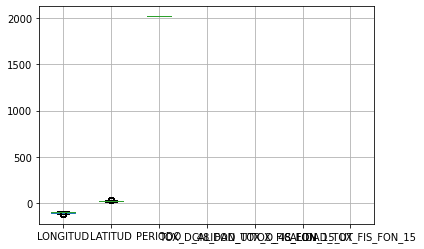

In [14]:
df.boxplot()

In [15]:
df_num = df[["LONGITUD","LATITUD"]]

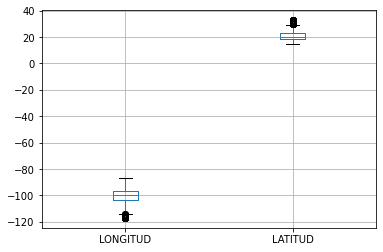

In [16]:
df_num.boxplot()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

El número total de registros supera al valor de registros para la variable de salida "Semáforo" por lo que se eliminan los registros NaN.

Trabajaremos en un respaldo del DF por si requerimos vovler al original

In [18]:
ndf = df
ndf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [19]:
ndf = ndf.dropna(how = 'all')
ndf

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,OCRBR5206M1,RIO SALADO PUENTE CARRETERO,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,RIO SALADO,LOTICO,RIO,-99.42142,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,SI,SI,LOTICO
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
3490,OCRBR5208M1,PUENTE INTERNACIONAL I NUEVO LAREDO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,RIO BRAVO,LOTICO,RIO,-99.50727,...,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LOTICO
3491,OCRBR5209M1,RIO BRAVO FRENTE A COMAPA,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 10,RIO BRAVO,LOTICO,RIO,-99.52221,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO


Ya tenemos sólo 3493 filas y 55 columnas como en el DF original. Los datos de texto que indican concentraciones menores a algo no son de utilidad y la variable objetivo "SEMAFORO" tiene tres categorías, verde amarillo y rojo. Si eliminamos o utilizamos la media general en todos los datos faltantes, pudieramos generar un sesgo. Pero al ya conocer la variable objetivo, pudieramos agruparlos ya que esperamos que sus valores de concentraciones sean similares para poder agruparse por los colores. Por lo que imputaremos la media por cada grupo.

In [20]:
ndf_vd = ndf[ndf.SEMAFORO == 'Verde'].copy()
ndf_am = ndf[ndf.SEMAFORO == 'Amarillo'].copy()
ndf_rj = ndf[ndf.SEMAFORO == 'Rojo'].copy()
ndf_var = [ndf_vd, ndf_am, ndf_rj]

Las variables que contienen concentraciones y corresponden a las que les imputaremos la media son las siguientes:

In [21]:
Var_conc = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']

Comenzando por las variables potables, o sea verdes comenzaremos cambiando los valores de concentración menor a por un valor numérico, así como la imputación de valores NaN por la media.

In [22]:
vd = list()
for color in Var_conc:
  ndf_vd[color] = ndf_vd[color].astype('str')
  ndf_vd[color] = ndf_vd[color].str.replace('<1','1') 
  ndf_vd[color] = ndf_vd[color].str.replace('<2','2') 
  ndf_vd[color] = ndf_vd[color].str.replace('<3','3') 
  ndf_vd[color] = ndf_vd[color].str.replace('<10','10') 
  ndf_vd[color] = ndf_vd[color].astype('float')
  promedio = ndf_vd[color].mean() 
  ndf_vd[color] = ndf_vd[color].replace(np.nan, promedio) 
  vd.append([color, promedio])

In [23]:
ndf_vd

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,OCRBR5119M1,LAGUNA MADRE HUMEDAL 6,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.46439,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3456,OCRBR5120M1,LAGUNA MADRE HUMEDAL 7,RIO BRAVO,TAMAULIPAS,MATAMOROS,LAGUNA MADRE NORTE,LAGUNA MADRE,COSTERO (HUMEDAL),LAGUNA,-97.47659,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3480,OCRBR5183M1,"SITIO 1, CANAL DE LLAMADA TOMA NORTE MUESTRA S...",RIO BRAVO,TAMAULIPAS,MIGUEL ALEMAN,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.95864,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO
3486,OCRBR5202M1,PRESA INTERNACIONAL FALCON 6,RIO BRAVO,TAMAULIPAS,GUERRERO,RIO BRAVO 11,PRESA INTERNACIONAL FALCON,LENTICO (HUMEDAL),PRESA,-99.24931,...,NaN,SI,SI,SI,SI,SI,ND,SI,SI,LENTICO


In [24]:
ndf_vd.describe()

,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,1267.000000,1267.000000,1267.0,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,...,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,0.0,0.0,1267.0,0.0,0.0
mean,-100.181832,21.397310,2020.0,3.372192,18.241230,24.810056,281.205882,91.069853,18.582263,75.425573,...,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,NaN,1.0,NaN,NaN
std,7.865871,4.472317,0.0,2.026717,5.873656,21.477673,180.914635,89.053108,26.784924,10.179535,...,9.277570,14.945546,0.047670,0.053842,0.049476,NaN,NaN,0.0,NaN,NaN
min,-117.124030,14.541280,2020.0,2.000000,10.000000,10.000000,3.000000,3.000000,3.000000,34.800000,...,35.200000,30.300000,1.000000,1.000000,1.000000,NaN,NaN,1.0,NaN,NaN
25%,-105.523060,17.951895,2020.0,2.000000,17.641000,10.000000,230.000000,41.000000,3.000000,75.425573,...,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,NaN,1.0,NaN,NaN
50%,-99.368000,20.686420,2020.0,3.372192,18.241230,16.000000,281.205882,91.069853,18.582263,75.425573,...,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,NaN,1.0,NaN,NaN
75%,-93.848050,24.147350,2020.0,3.372192,18.241230,31.660000,281.205882,91.069853,18.582263,75.425573,...,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,NaN,1.0,NaN,NaN
max,-86.732150,32.706500,2020.0,21.500000,40.000000,147.000000,991.000000,750.000000,197.000000,129.600000,...,124.300000,128.200000,2.699000,2.808000,2.390000,NaN,NaN,1.0,NaN,NaN


Repetimos el procedimiento con los valores del grupo de amarillos:

In [25]:
am = list()
for color in Var_conc:
  ndf_am[color] = ndf_am[color].astype('str')
  ndf_am[color] = ndf_am[color].str.replace('<1','1') 
  ndf_am[color] = ndf_am[color].str.replace('<2','2') 
  ndf_am[color] = ndf_am[color].str.replace('<3','3') 
  ndf_am[color] = ndf_am[color].str.replace('<10','10') 
  ndf_am[color] = ndf_am[color].astype('float')
  promedio = ndf_am[color].mean() 
  ndf_am[color] = ndf_am[color].replace(np.nan, promedio) 
  am.append([color, promedio])

In [26]:
ndf_am.describe()

,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,1135.000000,1135.000000,1135.0,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,...,1135.000000,1135.000000,1135.000000,1135.0,1135.000000,0.0,0.0,1135.000000,0.0,0.0
mean,-100.409841,21.063824,2020.0,3.821706,18.644803,93.376443,12109.446364,6901.537273,39.628571,77.476428,...,62.990196,53.175817,1.004065,1.0,1.001137,NaN,NaN,1.026016,NaN,NaN
std,4.888005,3.609725,0.0,3.751463,9.027821,385.109968,24691.078107,19493.249191,9.296610,24.553082,...,9.403530,12.255767,0.039304,0.0,0.005289,NaN,NaN,0.116504,NaN,NaN
min,-115.498450,14.534910,2020.0,2.000000,10.000000,10.000000,3.000000,3.000000,3.000000,10.000000,...,10.000000,10.000000,1.000000,1.0,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,-103.890050,18.298855,2020.0,2.000000,10.000000,10.000000,1872.000000,97.500000,39.628571,64.900000,...,62.990196,53.175817,1.000000,1.0,1.001137,NaN,NaN,1.026016,NaN,NaN
50%,-99.800420,20.152120,2020.0,2.000000,16.560000,23.400000,4600.000000,1100.000000,39.628571,77.476428,...,62.990196,53.175817,1.000000,1.0,1.001137,NaN,NaN,1.026016,NaN,NaN
75%,-97.134095,23.703455,2020.0,4.080000,25.200000,68.000000,24000.000000,6901.537273,39.628571,92.800000,...,62.990196,53.175817,1.000000,1.0,1.001137,NaN,NaN,1.026016,NaN,NaN
max,-86.805810,32.663990,2020.0,26.110000,40.000000,9408.000000,241960.000000,241960.000000,161.000000,226.100000,...,133.000000,136.500000,1.971000,1.0,1.160000,NaN,NaN,4.230000,NaN,NaN


Finalmente con los valores contaminados o sea rojos:

In [27]:
rj = list()
for color in Var_conc:
  ndf_rj[color] = ndf_rj[color].astype('str')
  ndf_rj[color] = ndf_rj[color].str.replace('<1','1') 
  ndf_rj[color] = ndf_rj[color].str.replace('<2','2') 
  ndf_rj[color] = ndf_rj[color].str.replace('<3','3') 
  ndf_rj[color] = ndf_rj[color].str.replace('<10','10') 
  ndf_rj[color] = ndf_rj[color].astype('float')
  promedio = ndf_rj[color].mean() 
  ndf_rj[color] = ndf_rj[color].replace(np.nan, promedio) 
  rj.append([color, promedio])

In [28]:
ndf_rj.describe()

,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,1091.000000,1091.000000,1091.0,1091.000000,1091.000000,1091.000000,1.091000e+03,1.091000e+03,1091.000000,1091.000000,...,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,0.0,0.0,1091.000000,0.0,0.0
mean,-100.514960,20.622648,2020.0,40.030949,144.593989,201.451951,2.490353e+05,2.102438e+05,6324.796078,49.159634,...,61.630556,55.338647,1.161204,3.179268,1.139708,NaN,NaN,1.082407,NaN,NaN
std,4.828816,3.385247,0.0,96.436763,210.479424,673.105512,1.789631e+06,1.610486e+06,3274.619815,24.118913,...,9.418011,13.805366,0.833617,8.057773,0.720948,NaN,NaN,0.375524,NaN,NaN
min,-117.107890,14.615670,2020.0,2.000000,14.400000,10.000000,3.000000e+00,3.000000e+00,10.000000,10.000000,...,10.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,-102.274535,18.970835,2020.0,6.475000,55.305000,20.000000,8.450000e+02,1.500000e+02,6324.796078,36.300000,...,61.630556,55.338647,1.000000,1.000000,1.139708,NaN,NaN,1.000000,NaN,NaN
50%,-99.923030,19.902140,2020.0,18.000000,91.000000,44.000000,2.400000e+04,5.172000e+03,6324.796078,49.159634,...,61.630556,55.338647,1.000000,2.246000,1.139708,NaN,NaN,1.082407,NaN,NaN
75%,-98.173810,20.986190,2020.0,40.030949,144.593989,126.000000,4.747500e+04,2.419600e+04,6324.796078,52.350000,...,61.630556,55.338647,1.161204,3.179268,1.139708,NaN,NaN,1.082407,NaN,NaN
max,-88.170970,32.666080,2020.0,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,179.500000,...,126.900000,146.000000,23.949000,156.250000,21.320000,NaN,NaN,7.870000,NaN,NaN


Ahora es necesario conocer las escalas  para cada calidad, por lo que tomaremos los valores de referencia del documento proporcionado:

In [29]:
calidad_ref = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-cad_kbcm_jfl/main/Reto/Escalas_superficial.csv', encoding='cp1252')
calidad_ref

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION
5,Excelente,SST menor o igual a 25,"Clase de excepci¢n, muy buena calidad."
6,Buena calidad,SST mayor de 25 y menor o igual a 75,Aguas superficiales con bajo contenido de soli...
7,Aceptable,SST mayor de 75 y menor o igual a 150,Aguas superficiales con indicio de contaminaci...
8,Contaminada,SST mayor de 150 y menor o igual a 400,Aguas superficiales de mala calidad con descar...
9,Fuertemente contaminada,SST mayor de 400,Aguas superficiales con fuerte impacto de desc...


In [30]:
calidades = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP','CALIDAD_OD_PORC_MED',
             'CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_D_48_FON','CALIDAD_TOX_FIS_SUP_15','CALIDAD_TOX_FIS_FON_15']

Los valores de referencia no se encuentran en un formato que permita su evaluación de forma automatizada, por lo que los valores se comparan de forma manual.

In [31]:
ndf_cal_ver = ndf_vd.loc[:,['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']]

In [32]:
ndf_cal_ver.describe(include='all')

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,0.0,1267.0,0.0
mean,3.372192,18.241230,24.810056,281.205882,91.069853,18.582263,75.425573,82.649896,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,1.0,NaN
std,2.026717,5.873656,21.477673,180.914635,89.053108,26.784924,10.179535,18.192419,9.277570,14.945546,0.047670,0.053842,0.049476,NaN,0.0,NaN
min,2.000000,10.000000,10.000000,3.000000,3.000000,3.000000,34.800000,30.200000,35.200000,30.300000,1.000000,1.000000,1.000000,NaN,1.0,NaN
25%,2.000000,17.641000,10.000000,230.000000,41.000000,3.000000,75.425573,70.800000,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,1.0,NaN
50%,3.372192,18.241230,16.000000,281.205882,91.069853,18.582263,75.425573,82.649896,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,1.0,NaN
75%,3.372192,18.241230,31.660000,281.205882,91.069853,18.582263,75.425573,94.450000,78.641516,74.517577,1.006513,1.009210,1.011264,NaN,1.0,NaN
max,21.500000,40.000000,147.000000,991.000000,750.000000,197.000000,129.600000,129.100000,124.300000,128.200000,2.699000,2.808000,2.390000,NaN,1.0,NaN


Con la comparación manual tenemos las siguientes escalas para los verdes:

* DBO_mg/L               Buena Calidad
* DQO_mg/L               Buena Calidad
* SST_mg/L               Excelente
* COLI_FEC_NMP_100mL     Aceptable
* E_COLI_NMP_100mL       Excelente
* ENTEROC_NMP_100mL      Excelente
* OD_PORC                Excelente
* OD_PORC_SUP            Excelente
* OD_PORC_MED            Excelente
* OD_PORC_FON            Excelente
* TOX_D_48_UT            Toxicidad Baja
* TOX_V_15_UT            Toxicidad Baja
* TOX_D_48_SUP_UT        Toxicidad Baja
* TOX_D_48_FON_UT        NaN
* TOX_FIS_SUP_15_UT      Toxicidad Baja
* TOX_FIS_FON_15_UT      NaN

In [33]:
ndf_cal_am = ndf_am.loc[:,['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']]
ndf_cal_am.describe(include='all')

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.0,1135.000000,0.0,1135.000000,0.0
mean,3.821706,18.644803,93.376443,12109.446364,6901.537273,39.628571,77.476428,87.246667,62.990196,53.175817,1.004065,1.0,1.001137,NaN,1.026016,NaN
std,3.751463,9.027821,385.109968,24691.078107,19493.249191,9.296610,24.553082,16.968640,9.403530,12.255767,0.039304,0.0,0.005289,NaN,0.116504,NaN
min,2.000000,10.000000,10.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.0,1.000000,NaN,1.000000,NaN
25%,2.000000,10.000000,10.000000,1872.000000,97.500000,39.628571,64.900000,87.246667,62.990196,53.175817,1.000000,1.0,1.001137,NaN,1.026016,NaN
50%,2.000000,16.560000,23.400000,4600.000000,1100.000000,39.628571,77.476428,87.246667,62.990196,53.175817,1.000000,1.0,1.001137,NaN,1.026016,NaN
75%,4.080000,25.200000,68.000000,24000.000000,6901.537273,39.628571,92.800000,87.246667,62.990196,53.175817,1.000000,1.0,1.001137,NaN,1.026016,NaN
max,26.110000,40.000000,9408.000000,241960.000000,241960.000000,161.000000,226.100000,187.700000,133.000000,136.500000,1.971000,1.0,1.160000,NaN,4.230000,NaN


In [34]:
for name in calidades:
  if name == 'CALIDAD_DBO':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_COLI_FEC':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_E_COLI':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_ENTEROC':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_FON':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_TOX_D_48':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    ndf_vd[name] = ndf_vd[name].astype('str')
    ndf_vd[name] = ndf_vd[name].replace('nan', 'nan')

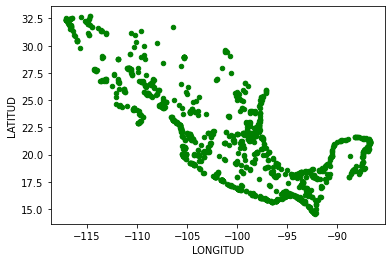

In [45]:
ndf_vd.plot.scatter('LONGITUD','LATITUD',c='green')

Con la comparación manual tenemos la siguiente escala para los amarillos:
*	DBO_mg/L		        Contaminada
* DQO_mg/L	       	  Contaminada
* SST_mg/L		        Contaminada
* COLI_FEC_NMP_100mL	Fuertemente contaminada
* E_COLI_NMP_100mL		Fuertemente contaminada
* ENTEROC_NMP_100mL		Fuertemente contaminada
*	OD_PORC		          Aceptable
*	OD_PORC_SUP		      Excelente
*	OD_PORC_MED	   	    Buena Calidad
*	OD_PORC_FON		      Buena Calidad
*	TOX_D_48_UT  		    Toxicidad Baja
*	TOX_V_15_UT	    	  Toxicidad moderada
*	TOX_D_48_SUP_UT	  	Toxicidad Baja
*	TOX_D_48_FON_UT		  NaN
*	TOX_FIS_SUP_15_UT		Toxicidad Baja
*	TOX_FIS_FON_15_UT	  NaN

In [35]:
for name in calidades:
  if name == 'CALIDAD_DBO':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Buena Calidad')
  if name == 'CALIDAD_DQO':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_SST':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_COLI_FEC':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_SUP':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD TOX_D_48_SUP':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    ndf_am[name] = ndf_am[name].astype('str')
    ndf_am[name] = ndf_am[name].replace('nan', 'nan')

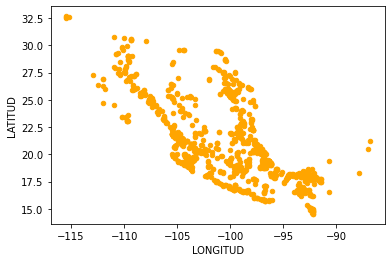

In [47]:
ndf_am.plot.scatter('LONGITUD','LATITUD',c='orange')

In [36]:
ndf_cal_rj = ndf_rj.loc[:,['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED',
             'OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_D_48_FON_UT','TOX_FIS_SUP_15_UT','TOX_FIS_FON_15_UT']]
ndf_cal_rj.describe(include='all')

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT
count,1091.000000,1091.000000,1091.000000,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,0.0,1091.000000,0.0
mean,40.030949,144.593989,201.451951,2.490353e+05,2.102438e+05,6324.796078,49.159634,75.384412,61.630556,55.338647,1.161204,3.179268,1.139708,NaN,1.082407,NaN
std,96.436763,210.479424,673.105512,1.789631e+06,1.610486e+06,3274.619815,24.118913,22.456109,9.418011,13.805366,0.833617,8.057773,0.720948,NaN,0.375524,NaN
min,2.000000,14.400000,10.000000,3.000000e+00,3.000000e+00,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN
25%,6.475000,55.305000,20.000000,8.450000e+02,1.500000e+02,6324.796078,36.300000,75.384412,61.630556,55.338647,1.000000,1.000000,1.139708,NaN,1.000000,NaN
50%,18.000000,91.000000,44.000000,2.400000e+04,5.172000e+03,6324.796078,49.159634,75.384412,61.630556,55.338647,1.000000,2.246000,1.139708,NaN,1.082407,NaN
75%,40.030949,144.593989,126.000000,4.747500e+04,2.419600e+04,6324.796078,52.350000,75.384412,61.630556,55.338647,1.161204,3.179268,1.139708,NaN,1.082407,NaN
max,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,179.500000,289.000000,126.900000,146.000000,23.949000,156.250000,21.320000,NaN,7.870000,NaN


Con la escala manual tenemos la siguiente escala para los rojos:
*	DBO_mg/L		       Buena Calidad
*	DQO_mg/L	         Buena Calidad
*	SST_mg/L		       Aceptable
*	COLI_FEC_NMP_100mL Fuertemente contaminada
*	E_COLI_NMP_100mL	 Fuertemente contaminada
*	ENTEROC_NMP_100mL	 Excelente
*	OD_PORC		         Excelente
*	OD_PORC_SUP		     Excelente
*	OD_PORC_MED		     Buena Calidad
*	OD_PORC_FON		     Buena Calidad
*	TOX_D_48_UT		     Toxicidad Baja
*	TOX_V_15_UT		     Toxicidad Baja
*	TOX_D_48_SUP_UT		 Toxicidad Baja
*	TOX_D_48_FON_UT		 NaN
*	TOX_FIS_SUP_15_UT	 Toxicidad Baja
*	TOX_FIS_FON_15_UT  NaN

In [37]:
for name in calidades:
  if name == 'CALIDAD_DBO':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Contaminada')
  if name == 'CALIDAD_DQO':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_SST':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Contaminada') 
  if name == 'CALIDAD_COLI_FEC':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_E_COLI':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_ENTEROC':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Fuertemente contaminada') 
  if name == 'CALIDAD_OD_PORC':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Aceptable') 
  if name == 'CALIDAD_OD_PORC_SUP':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Excelente') 
  if name == 'CALIDAD_OD_PORC_MED':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_OD_PORC_FON':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Buena Calidad') 
  if name == 'CALIDAD_TOX_D_48':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_V_15':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Toxicidad Moderada') 
  if name == 'CALIDAD TOX_D_48_SUP':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_D_48_FON':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'nan') 
  if name == 'CALIDAD_TOX_FIS_SUP_15':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'Toxicidad Baja') 
  if name == 'CALIDAD_TOX_FIS_FON_15':
    ndf_rj[name] = ndf_rj[name].astype('str')
    ndf_rj[name] = ndf_rj[name].replace('nan', 'nan')

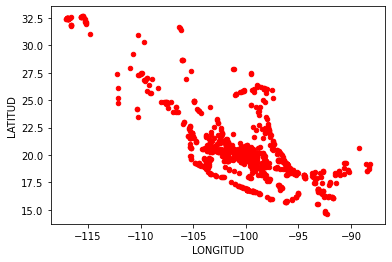

In [48]:
ndf_rj.plot.scatter('LONGITUD','LATITUD',c='red')

In [38]:
dfproc = pd.concat([ndf_vd, ndf_am, ndf_rj])

In [39]:
dfproc

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,OCRBR5149M2,LAGUNA LA ESCONDIDA (ENTRADA),RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.28476,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO
3481,OCRBR5191M1,"SITIO 5, CANAL DE LLAMADA TOMA SUR MUESTRA SUP...",RIO BRAVO,TAMAULIPAS,CAMARGO,RIO SAN JUAN 3,PRESA MARTE R. GOMEZ,LENTICO (HUMEDAL),PRESA,-98.92999,...,"DQO,",SI,NO,SI,SI,SI,ND,SI,SI,LENTICO
3483,OCRBR5194M2,LAGUNA LA ESCONDIDA AL NORTE DEL CENTRO CULTUR...,RIO BRAVO,TAMAULIPAS,REYNOSA,RIO BRAVO 13,LAGUNA LA ESCONDIDA,LENTICO,LAGUNA,-98.27113,...,"DQO,CF,E_COLI,",SI,NO,SI,NO,NO,ND,SI,SI,LENTICO
3489,OCRBR5207M1,EL LAGUITO,RIO BRAVO,TAMAULIPAS,NUEVO LAREDO,RIO BRAVO 11,EL LAGUITO,LENTICO,LAGO,-99.53064,...,"DBO,DQO,CF,",NO,NO,SI,NO,SI,ND,SI,SI,LENTICO


In [40]:
dfproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3490
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                3493 non-null   float64
 13  CALIDAD_DBO             3493 non-null   object 
 14  DQO_mg/L                3493 non-null   

## **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K-means.**

In [41]:
etiqueta_sem = LabelEncoder()
dfproc["SEMAFORO_Codigo"]= etiqueta_sem.fit_transform(dfproc["SEMAFORO"])
dfproc["SEMAFORO_Codigo"].unique()

array([2, 0, 1])

In [42]:
dfproc[['SEMAFORO','SEMAFORO_Codigo']]

,SEMAFORO,SEMAFORO_Codigo
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
...,...,...
3479,Rojo,1
3481,Rojo,1
3483,Rojo,1
3489,Rojo,1


## **Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**